#### Q-1: Write a program to create an empty series.

In [1]:
import numpy as np 
import pandas as pd

In [127]:
empt_series = pd.Series()
empt_series

Series([], dtype: object)

#### Q-2: Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [128]:
ser1 = pd.Series([200,440,204,500])
ser2 = pd.Series([430,420,201,220])
ser1 + ser2

0    630
1    860
2    405
3    720
dtype: int64

In [129]:
ser1 - ser2

0   -230
1     20
2      3
3    280
dtype: int64

In [130]:
ser1 * ser2

0     86000
1    184800
2     41004
3    110000
dtype: int64

In [131]:
ser1 / ser2

0    0.465116
1    1.047619
2    1.014925
3    2.272727
dtype: float64

#### Q-3 Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]

In [132]:
s1 = pd.Series([2, 4, 6, 8, 10])
s2 = pd.Series([1, 3, 5, 7, 10])
s1>s2


0     True
1     True
2     True
3     True
4    False
dtype: bool

In [133]:
s1<s2

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [134]:
s1==s2

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [135]:
s1!=s2

0     True
1     True
2     True
3     True
4    False
dtype: bool

#### Q-5.Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
series = pd.Series([1,2,'Python', 2.0, True, 100])

change to float type data

Note: Read about pd.to_numeric()

In [136]:
series = pd.Series([1,2,'Python', 2.0, True, 100])

def type_conversion(series, d_type):
    return(pd.to_numeric(series, errors = "coerce", downcast = d_type))

type_conversion(series, "float")

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float32

#### Q-6 Find top 10 most run getter from the series.

In [137]:
batter = pd.read_csv("batsman_runs_series.csv", index_col = "batter")["batsman_run"]  
## squeeze parameter has been remove so we are directly using col i.e., df["col"]
print(type(batter))   

<class 'pandas.core.series.Series'>


In [138]:
bat = pd.read_csv("batsman_runs_series.csv", index_col = "batter").squeeze()  ## squeeze parameter has been remove so we are using df.squeeze()
print(type(bat))

<class 'pandas.core.series.Series'>


In [139]:
batter

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

In [140]:
batter.sort_values(ascending = False).head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

#### Q-7 No of players having runs above 3000

In [141]:
batter[batter.values>3000].size
# method 1

20

In [142]:
# method 2
batter[batter.values>3000].count().item()

20

#### Q-8 No of players having runs above mean value?

In [143]:
batter[batter.values > batter.mean()].count().item()

128

#### Q-9
i. Read `items.csv` making `item_name` as index.

ii. Show no of nan values

iii. Item price is given in $, so convert it to rupees without currency symbol.

iv. Make data type of newly made series as float.

v. Fill nan with mean of the series

In [144]:
#i
items = pd.read_csv("items.csv", index_col = "item_name")["item_price"]
items

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [145]:
# ii
items[items.isnull()].count().item()  # method 1

0

In [146]:
items[items.values == np.nan].count().item() # method 2

0

In [148]:
car = pd.read_csv("carvana - carvana.csv")

#### Q10 
make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.
There are some challenges to solve this task:

There is no column that is represented to the brand name of the car. You have to find out on your own.
Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.


In [149]:
car

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [150]:
## cleaning year column
def clean(x):
    x = str(x)
    if len(x) > 4:
        x = x[0:-1]
    return x
        

In [151]:
car["Year"] = car["Year"].apply(clean)

In [152]:
car["Year"][4]

'2017'

In [153]:
# making brand column
car["Brand"] = car["Name"].str.split(" ", n=1).str.get(0)
car

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
2,Jeep Wrangler,2012,81068,21590,Jeep
3,Jeep Renegade,2019,35372,21590,Jeep
4,BMW X,2017,68992,22990,BMW
...,...,...,...,...,...
21995,Honda Accord,2014,98085,17590,Honda
21996,Dodge Charger,2016,62616,23990,Dodge
21997,Ford Taurus,2013,50345,16990,Ford
21998,Toyota Corolla Hatchback,2020,27945,23990,Toyota


In [154]:
year = ["2018", "2019", "2020", "2021", "2022"]
temp_df = car[car["Year"].isin(year)]
temp_df

,Name,Year,Miles,Price,Brand
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
3,Jeep Renegade,2019,35372,21590,Jeep
5,Buick Encore,2019,47973,18590,Buick
24,Mitsubishi Eclipse Cross,2018,85475,16990,Mitsubishi
...,...,...,...,...,...
21976,Jeep Renegade,2020,63054,20590,Jeep
21978,Nissan Versa,2022,9975,22990,Nissan
21982,Nissan Murano,2019,38638,24990,Nissan
21987,Volkswagen Tiguan,2019,42636,24990,Volkswagen


In [155]:
table = temp_df.pivot_table(index = "Brand", columns = "Year", values = ["Price","Miles"], aggfunc = {"Price": "mean" , "Miles":"median"})
table

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand                                                                      
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi           49762.0  50169.5  30423.5  11205.0  20917.0  30345.555556   
BMW            39269.0  36306.0  23171.0  19978.0   3780.0  31762.093023   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       57116.0  29609.0  41046.0      NaN      NaN  28390.000000   
Chevrolet      53252.0  46382.0  50095.0  38255.0  15117.0  20917.766917   
Chrysler       67400.0  65963.0  33444.0  48027.5  24427.0  25006.100000   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
Ford           50238.0  47203.0  49136.0  17635.5   5298.5  19529.978903   
GMC            54181.0  54017.0  55721.0  43029.0  10246.5  24797.555556   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8160.0  19335.487603   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32006.0  14114.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MAZDA          44267.0  37844.0  31832.0  41606.0   2071.0  22720.603448   
MINI           36562.0  35508.0  13268.0      NaN   5758.5  25065.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     48827.0  45100.0  39941.0  31809.0   6774.0  17137.058824   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Polestar           NaN      NaN      NaN      NaN   6188.0           NaN   
Porsche        47451.0      NaN      NaN      NaN      NaN  42590.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla          32481.0  26977.5  24383.0  15517.0   6454.0  42923.333333   
Toyota         45770.0  19796.0  37726.0  20862.0   7368.0  22900.656410   
Volkswagen     50991.0  46335.0  30069.0  23098.0  14056.5  21447.142857   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand                                                                   
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi           28590.000000  32490.000000  71990.000000   39590.000000  
BMW            33280.909091  39811.083333  37062.727273   57030.000000  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       32290.000000  38777.266667           NaN            NaN  
Chevrolet      20828.634731  24188.992366  24584.842767   28010.000000  
Chrysler       26896.333333  30196.555556  28690.000000   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
Ford           21677.625899  24510.070000  29725.218750   45485.333333  
GMC            23809.533333  26820.650000  33077.222222   34490.000000  
Honda          24635.039683  26273.500000  25889.470899   34710.000000  
Hyundai        21203.389831  22059.451220  23476.301370   29361.875000  
Jaguar         33990.000000  44390.000000  60723.333333            NaN  
Jeep           23255.171233  27072.555556  27614.642857   52023.333333  
Kia            23777.239748  22863.761062 

<Axes: ylabel='Density'>

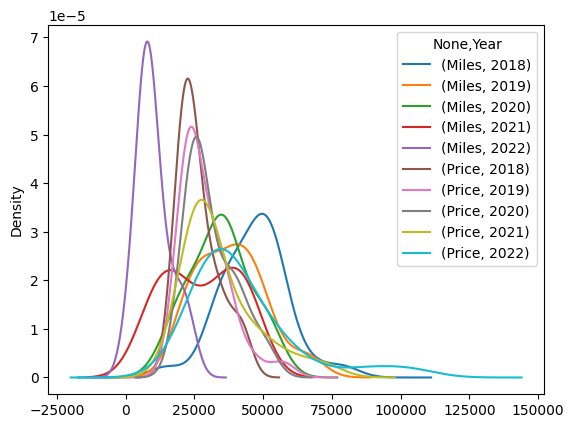

In [156]:
table.plot(kind = "kde")

<Axes: title={'center': 'KDE of Miles'}, ylabel='Density'>

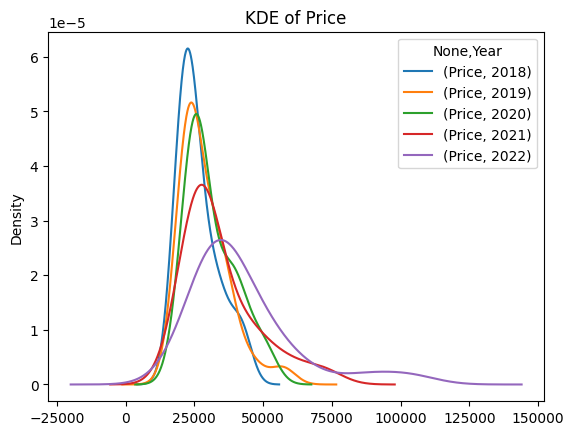

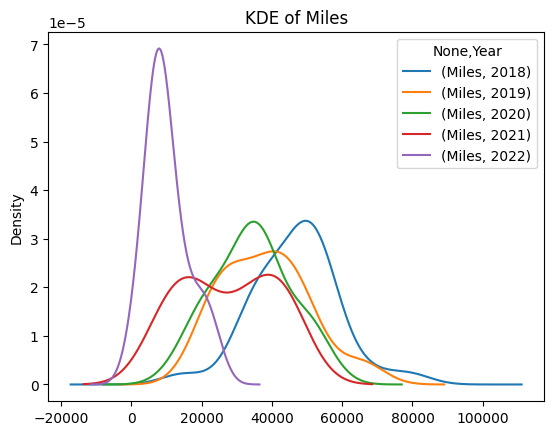

In [157]:
# KDE for all Price columns
table.filter(like="Price").plot(kind="kde", title="KDE of Price")

# KDE for all Miles columns
table.filter(like="Miles").plot(kind="kde", title="KDE of Miles")


#### Question-11:
You are given a dataset of Daily Power Generation in India of regional wise of all Power Stations. 

In this dataset, there are many columns. Two of them are Actual(MU) and Excess(+) / Shortfall (-). Actual(MU) represents the actual power generation. Excess(+) / Shortfall (-) tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
Find out the month of the day and store it as a new column.
Find out top 10 frequently appeared power stations in this dataframe.
Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
It is hard to get inside if you look through the only pivot table. So plot the pivot table.


In [158]:
power = pd.read_csv("PowerGeneration - PowerGeneration.csv")
power.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [159]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Dates                             345273 non-null  object 
 1   Power Station                     345273 non-null  object 
 2   Monitored Cap.(MW)                345273 non-null  float64
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64
 4   Planned Maintanence (MW)          345273 non-null  float64
 5   Forced Maintanence(MW)            345273 non-null  float64
 6   Other Reasons (MW)                345273 non-null  int64  
 7   Programme or Expected(MU)         345273 non-null  int64  
 8   Actual(MU)                        345273 non-null  int64  
 9   Excess(+) / Shortfall (-)         345273 non-null  float64
 10  Deviation                         345273 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.

In [160]:
power["Actual Power Required"] = power["Actual(MU)"] - power["Excess(+) / Shortfall (-)"]

In [161]:
power

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Actual Power Required
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69
...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55


In [162]:
power["Dates"] = pd.to_datetime(power["Dates"])
power["Dates"].dtype

dtype('<M8[ns]')

In [163]:
## adding month column
power["Month"] = power["Dates"].dt.month_name()

In [164]:
power

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Actual Power Required,Month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71,April
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59,April
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72,April
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55,April


In [165]:
# Find out top 10 frequently appeared power stations in this dataframe. 

In [166]:
power["Power Station"].value_counts().head(10)

Power Station
NTPC Ltd.    9570
NHPC         5742
NPCIL        5742
GMR ENERG    5742
APL          3828
JPPVL        3828
IBPIL        3828
TATA PCL     3828
JSWEL        3828
NLC          3828
Name: count, dtype: int64

In [167]:
# Next create a pivot table of which every row represents a power station and every column represents a month in a order. 
# Like January, February, March... It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [168]:
df = power.sort_values(by = "Month")

In [169]:
power_tbl = df.pivot_table(index = "Power Station", columns = "Month", values = ["Actual Power Required", "Excess(+) / Shortfall (-)"])

In [171]:
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
power_tbl = power_tbl.reindex(columns=month_order, level=1)  # level=1 = Month
power_tbl

Actual Power Required                                   \
Month                       January   February      March      April   
Power Station                                                          
0                               NaN        NaN        NaN        NaN   
ABAN POWR                  1.110581   1.025532   0.951215   1.037667   
ACB                        4.518387   5.205603   5.035748   4.682583   
ACPL                       0.000000   0.000000   0.000000   0.000000   
ADHPL                      0.019677   0.027234   0.059299   0.519417   
...                             ...        ...        ...        ...   
VESPL                      0.000000   0.000000   0.000000   0.000000   
VIP                        5.924000   5.071631   7.377804   4.750750   
VVL                        0.000000   0.000000   0.000000   0.000000   
WPCL                      26.104065  26.196312  26.383645  30.290083   
West Bengal               74.519484  77.637305  78.129766  84.003833   

                                                                      \
Month                May       June       July     August  September   
Power Station                                                          
0                    NaN        NaN        NaN        NaN        NaN   
ABAN POWR       1.061048   1.046533   1.086883   1.054452   1.000000   
ACB             5.203065   5.402267   5.327468   4.976839   5.218222   
ACPL            0.000000   0.000000   0.000000   0.000000   0.000000   
ADHPL           1.927984   3.295533   4.307208   3.680774   1.996444   
...                  ...        ...        ...        ...        ...   
VESPL           0.000000   0.000000   0.000000   0.000000   0.000000   
VIP             4.747984   5.088333   4.832208   4.830710   5.688667   
VVL             0.000000   0.000000   0.000000   0.000000   0.000000   
WPCL           29.663629  27.130133  25.799675  24.958645  22.443278   
West Bengal    82.778952  80.252067  77.074416  72.408065  77.367722   

                          ... Excess(+) / Shortfall (-)                      \
Month            October  ...                     March     April       May   
Power Station             ...                                                 
0              15.569841  ...                       NaN       NaN       NaN   
ABAN POWR       1.116909  ...                  0.179626 -0.437667 -0.262661   
ACB             5.094121  ...                 -0.381542 -0.457583 -0.912742   
ACPL            0.000000  ...                  0.000000  0.000000  0.000000   
ADHPL           0.812485  ...                 -0.007897  0.088917 -0.629597   
...                  ...  ...                       ...       ...       ...   
VESPL           0.000000  ...                  0.000000  0.000000  0.000000   
VIP             5.885939  ...                 -5.891822 -3.284083 -3.256048   
VVL             0.000000  ...                  0.000000  0.000000  0.000000   
WPCL           26.712485  ...                  1.971495  4.843250  3.408952   
West Bengal    79.964757  ...                  6.328178  6.804500  1.342016   

                                                                           \
Month              June      July    August September   October  November   
Power Station                                                               
0                   NaN       NaN       NaN       NaN -0.644841       NaN   
ABAN POWR     -0.159867 -0.028442 -0.273806 -0.216667 -0.171455 -0.329441   
ACB           -0.802267 -1.152143 -1.163935 -1.768222 -1.088061 -0.623408   
ACPL           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
ADHPL         -0.662200 -0.112403  0.080516  0.103556  0.132970 -0.111173   
...                 ...       ...       ...       ...       ...       ...   
VESPL          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
VIP           -3.735000 -3.442597 -3.824258 -2.427556 -2.722303 -2.208101   
VVL            0.000000  0.000000  0.00000

#### Q-12 
You are given a file question-answer.csv. Your task is to make a dataframe from it with two columns - question and answers.
Questions in the file start from Q<number>; E.g. Q1 denotes question no. 1
Answers starts from Ans<number>; Eg. Ans1 denotes answer of question no 1
MAke sure you look at columns name carefully

In [211]:
df = pd.read_csv("question-answer.csv", index_col=0)
type(df)
df

,2
0,Q1-What is Data Science?
1,"Ans1-Data Science combines statistics, maths, ..."
2,Q2-2. How is logistic regression done?
3,Ans2-Logistic regression measures the relation...
4,Q3-How do you build a random forest model?
5,Ans3-A random forest is built up of a number o...
6,Q4-How can you avoid overfitting your model?
7,Ans4-Overfitting refers to a model that is onl...
8,Q5-You are given a data set consisting of vari...
9,Ans5-The following are ways to handle missing ...


In [232]:
questions = pd.DataFrame(df.iloc[::2]).reset_index(drop = True)
questions.rename(columns={"2":"questions"},inplace = True)

In [233]:
answers = pd.DataFrame(df.iloc[1::2]).reset_index(drop=True)
answers.rename(columns={"2":"answers"},inplace = True)

In [234]:
ques_ans = pd.concat([questions, answers], ignore_index = False, axis = 1).reset_index(drop=True)
ques_ans

,questions,answers
0,Q1-What is Data Science?,"Ans1-Data Science combines statistics, maths, ..."
1,Q2-2. How is logistic regression done?,Ans2-Logistic regression measures the relation...
2,Q3-How do you build a random forest model?,Ans3-A random forest is built up of a number o...
3,Q4-How can you avoid overfitting your model?,Ans4-Overfitting refers to a model that is onl...
4,Q5-You are given a data set consisting of vari...,Ans5-The following are ways to handle missing ...
5,Q6-What is bag of words? How we can use it for...,Ans6-Bag of Words is a representation of text ...
6,Q7-How can we use machine learning for text cl...,Ans7-Machine learning classification algorithm...
7,Q8-What is a time series?,Ans8-A time series is a set of observations or...
8,Q9-How is time series different from the usual...,Ans9-The principle behind causal forecasting i...
9,Q10-What are the different types of joins? Wha...,Ans10-(INNER) JOIN: Returns records that have ...


#### Q-5: Print Question and answer of those questions which does not contains any question mark (?).

In [245]:
ques_ans[~(ques_ans['questions'].str.contains("/?"))]

,questions,answers


#### Q 6-10 LOG and EMPLOYEE
Show activity details month wise. Show count for each activity

Find employee who did most activity in January month.

Employee who have worked most no of times on Weekends.

Which activity is logged most on buisness days.

Week Days wise activity table.

In [2]:
log = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
emp = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")


In [3]:
log.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [4]:
emp.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [5]:
#Show activity details month wise. Show count for each activity

log["dt"].dtype

dtype('O')

In [6]:
log["dt"] = pd.to_datetime(log["dt"])

In [7]:
log["month"] = log["dt"].dt.month_name()
log

,Log_ID,dt,dept,emp_id,activity,eqpt,month
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January
4,1004,2022-01-11,Dept3,138,Checking,Battery,January
...,...,...,...,...,...,...,...
360,1360,2023-01-02,Dept2,122,Repair,AC,January
361,1361,2023-01-03,Dept4,116,Checking,Server,January
362,1362,2023-01-04,Dept4,110,Checking,CPU,January
363,1363,2023-01-05,Dept4,102,Inspection,AC,January


In [8]:
activity_count = log.groupby(['month', 'activity']).size().unstack(fill_value=0)
print(activity_count)


activity   Checking  Cleaning  Inspection  Repair
month                                            
April             5        11           9       5
August            8        10           9       4
December          6         7          12       6
February          7         7           4      10
January           7        10           9       5
July              6         6          14       5
June              5         7           8      10
March             8         6           5      12
May               5         8           7      11
November          8         9           6       7
October          13         4           5       9
September         8         3          12       7


In [ ]:
#Find employee who did most activity in January month.

In [11]:
emp_act = log.merge(emp, right_on = "EMPLOYEE_ID", left_on = "emp_id")
emp_act

,Log_ID,dt,dept,emp_id,activity,eqpt,month,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,115,Alexander,Khoo,AKHOO
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,105,David,Austin,DAUSTIN
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,112,NaN,Urman,JMURMAN
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,120,Matthew,Weiss,MWEISS
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,138,Stephen,Stiles,SSTILES
...,...,...,...,...,...,...,...,...,...,...,...
290,1360,2023-01-02,Dept2,122,Repair,AC,January,122,Payam,Kaufling,PKAUFLING
291,1361,2023-01-03,Dept4,116,Checking,Server,January,116,Shelli,Baida,SBAIDA
292,1362,2023-01-04,Dept4,110,Checking,CPU,January,110,John,Chen,JCHEN
293,1363,2023-01-05,Dept4,102,Inspection,AC,January,102,Lex,De Haan,LDEHAAN


In [38]:
x = emp_act[emp_act["month"]=="January"].groupby("emp_id").size().sort_values().tail(1)
x

emp_id
122    3
dtype: int64

In [42]:
id = x.index.item()
id

122

In [43]:
x = emp_act[emp_act["month"]=="January"].groupby("emp_id").size().sort_values().tail(1).index.item()
x

122

In [46]:
emp_name = emp_act[emp_act["emp_id"]==122]["FIRST_NAME"]
emp_name.unique()[0]

'Payam'

In [47]:
# Employee who have worked most no of times on Weekends.
emp_act.sample(3)

,Log_ID,dt,dept,emp_id,activity,eqpt,month,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
278,1342,2022-12-15,Dept3,135,Repair,Generator,December,135,Ki,Gee,KGEE
74,1088,2022-04-05,Dept1,139,Cleaning,Fan,April,139,John,Seo,JSEO
11,1015,2022-01-22,Dept4,107,Cleaning,Pump,January,107,Diana,Lorentz,DLORENTZ


In [51]:
emp_act["day"]= emp_act["dt"].dt.day_name()
emp_act

,Log_ID,dt,dept,emp_id,activity,eqpt,month,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,day
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,January,115,Alexander,Khoo,AKHOO,Friday
1,1001,2022-01-08,Dept4,105,Cleaning,Generator,January,105,David,Austin,DAUSTIN,Saturday
2,1002,2022-01-09,Dept3,112,Inspection,CPU,January,112,NaN,Urman,JMURMAN,Sunday
3,1003,2022-01-10,Dept4,120,Inspection,UPS,January,120,Matthew,Weiss,MWEISS,Monday
4,1004,2022-01-11,Dept3,138,Checking,Battery,January,138,Stephen,Stiles,SSTILES,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
290,1360,2023-01-02,Dept2,122,Repair,AC,January,122,Payam,Kaufling,PKAUFLING,Monday
291,1361,2023-01-03,Dept4,116,Checking,Server,January,116,Shelli,Baida,SBAIDA,Tuesday
292,1362,2023-01-04,Dept4,110,Checking,CPU,January,110,John,Chen,JCHEN,Wednesday
293,1363,2023-01-05,Dept4,102,Inspection,AC,January,102,Lex,De Haan,LDEHAAN,Thursday


In [58]:
id = emp_act[emp_act["day"].isin(["Sunday", "Saturday"])].groupby("emp_id").size().sort_values().tail(1).index[0].item()
id

109

In [64]:
emp_act[emp_act["emp_id"]==109]["FIRST_NAME"].unique()[0]

'Daniel'

In [65]:
# Which activity is logged most on buisness days.
emp_act.sample(3)

,Log_ID,dt,dept,emp_id,activity,eqpt,month,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,day
34,1040,2022-02-16,Dept4,139,Repair,Fan,February,139,John,Seo,JSEO,Wednesday
200,1244,2022-09-08,Dept4,134,Inspection,Battery,September,134,Michael,Rogers,MROGERS,Thursday
102,1125,2022-05-12,Dept2,137,Repair,Pump,May,137,Renske,Ladwig,RLADWIG,Thursday


In [67]:
emp_act[~(emp_act["day"].isin(["Sunday", "Saturday"]))].groupby("activity").size().sort_values().tail(1).index[0]

'Inspection'

In [70]:
## alternate way
emp_act[~emp_act["day"].isin(["Sunday", "Saturday"])].groupby("activity").size().idxmax()


'Inspection'

In [76]:
# Week Days wise activity table.
emp_act.groupby(["day","activity"]).size().unstack(ffill=0)

TypeError: Series.unstack() got an unexpected keyword argument 'ffill'